download source data from internet

In [1]:
#1
#download source data from internet
from requests import get

def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')


We get the math symbols data from "https://www.kaggle.com/sagyamthapahandwritten-math-symbols"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#2
#import libraries
import gzip
import os
import numpy as np
import pandas as pd
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [4]:
#ls "/content/drive/My Drive/neuralNetworks/mainData/train/equal"

trainPlusPath = "/content/drive/My Drive/neuralNetworks/mainData/train/plus" 
trainMinusPath = "/content/drive/My Drive/neuralNetworks/mainData/train/minus" 
trainDivPath = "/content/drive/My Drive/neuralNetworks/mainData/train/div" 
trainTimesPath = "/content/drive/My Drive/neuralNetworks/mainData/train/times" 

testPlusPath = "/content/drive/My Drive/neuralNetworks/mainData/test/plus" 
testMinusPath = "/content/drive/My Drive/neuralNetworks/mainData/test/minus" 
testDivPath = "/content/drive/My Drive/neuralNetworks/mainData/test/div" 
testTimesPath = "/content/drive/My Drive/neuralNetworks/mainData/test/times" 

trainPlusLen = len(os.listdir(trainPlusPath))
trainMinusLen = len(os.listdir(trainMinusPath))
trainDivLen = len(os.listdir(trainDivPath))
trainTimesLen = len(os.listdir(trainTimesPath))

testPlusLen = len(os.listdir(testPlusPath))
testMinusLen = len(os.listdir(testMinusPath))
testDivLen = len(os.listdir(testDivPath))
testTimesLen = len(os.listdir(testTimesPath))

print("trainPlusLen: "+str(trainPlusLen)+ " trainMinusLen: "+ str(trainMinusLen) + " trainDivLen: "+ str(trainDivLen)+ " trainTimesLen: "+ str(trainTimesLen))
print("testPlusLen: "+str(testPlusLen)+ " testMinusLen: "+ str(testMinusLen) + " testDivLen: "+ str(testDivLen)+ " testTimesLen: "+ str(testTimesLen))

trainPlusLen: 545 trainMinusLen: 549 trainDivLen: 544 trainTimesLen: 556
testPlusLen: 78 testMinusLen: 80 testDivLen: 78 testTimesLen: 80


/content/drive/My Drive/neuralNetworks/mainData/train/plus/3614.jpg
JPEG
(155, 135)
RGB
<class 'numpy.ndarray'>
(28, 28, 3)


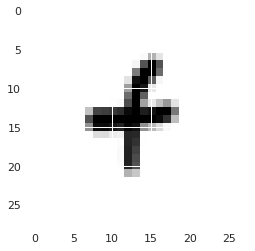

In [5]:
import os, random
from PIL import Image
from numpy import asarray
fileName = "/content/drive/My Drive/neuralNetworks/mainData/train/plus/" + str(random.choice(os.listdir("/content/drive/My Drive/neuralNetworks/mainData/train/plus"))) #change dir name to whatever
print(fileName)

image = Image.open(fileName)
image.show()
print(image.format)
print(image.size)
img = image.resize((28,28))
print(image.mode)

data = asarray(img)
print(type(data[0]))
# summarize shape
print(data.shape)

plt.imshow(data, cmap=plt.cm.gray_r)

In [6]:
#3
#read mnist data from source 
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

In [7]:
#4
#implementation test and train data
train = {}
test = {}

train['features'], train['labels'] = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test['features'], test['labels'] = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')


In [8]:
train['features']      = np.pad(train['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
test['features']       = np.pad(test['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(train['features'][0].shape))

Updated Image Shape: (32, 32, 1)


In [9]:
#5
#display image function
def display_image(position):
    image = train['features'][position].squeeze()
    print(image.shape)
    plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

(32, 32)


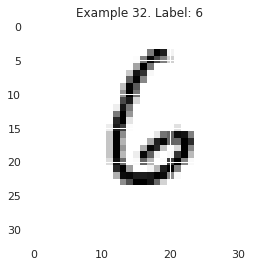

In [10]:
display_image(32)

In [11]:
#6
#for the train
#seperation of zeros, ones, ... , nines
resultOfZeros = np.where(train['labels'] == 0)
print('len(resultOfZeros): ', len(resultOfZeros[0]))
resultOfOnes = np.where(train['labels'] == 1)
print('len(resultOfOnes): ', len(resultOfOnes[0]))
resultOfTwos = np.where(train['labels'] == 2)
print('len(resultOfTwos): ', len(resultOfTwos[0]))
resultOfThrees = np.where(train['labels'] == 3)
print('len(resultOfThrees): ', len(resultOfThrees[0]))
resultOfFours = np.where(train['labels'] == 4)
print('len(resultOfFours): ', len(resultOfFours[0]))
resultOfFives = np.where(train['labels'] == 5)
print('len(resultOfFives): ', len(resultOfFives[0]))
resultOfSixes = np.where(train['labels'] == 6)
print('len(resultOfSixes): ', len(resultOfSixes[0]))
resultOfSevens = np.where(train['labels'] == 7)
print('len(resultOfSevens): ', len(resultOfSevens[0]))
resultOfEights = np.where(train['labels'] == 8)
print('len(resultOfEights): ', len(resultOfEights[0]))
resultOfNines = np.where(train['labels'] == 9)
print('len(resultOfNines): ', len(resultOfNines[0]))

len(resultOfZeros):  5923
len(resultOfOnes):  6742
len(resultOfTwos):  5958
len(resultOfThrees):  6131
len(resultOfFours):  5842
len(resultOfFives):  5421
len(resultOfSixes):  5918
len(resultOfSevens):  6265
len(resultOfEights):  5851
len(resultOfNines):  5949


In [12]:
#6
#for the test
#seperation of zeros, ones, ... , nines
resultOfZerosTest = np.where(test['labels'] == 0)
print('len(resultOfZeros): ', len(resultOfZerosTest[0]))
resultOfOnesTest = np.where(test['labels'] == 1)
print('len(resultOfOnes): ', len(resultOfOnesTest[0]))
resultOfTwosTest = np.where(test['labels'] == 2)
print('len(resultOfTwos): ', len(resultOfTwosTest[0]))
resultOfThreesTest = np.where(test['labels'] == 3)
print('len(resultOfThrees): ', len(resultOfThreesTest[0]))
resultOfFoursTest = np.where(test['labels'] == 4)
print('len(resultOfFours): ', len(resultOfFoursTest[0]))
resultOfFivesTest = np.where(test['labels'] == 5)
print('len(resultOfFives): ', len(resultOfFivesTest[0]))
resultOfSixesTest = np.where(test['labels'] == 6)
print('len(resultOfSixes): ', len(resultOfSixesTest[0]))
resultOfSevensTest = np.where(test['labels'] == 7)
print('len(resultOfSevens): ', len(resultOfSevensTest[0]))
resultOfEightsTest = np.where(test['labels'] == 8)
print('len(resultOfEights): ', len(resultOfEightsTest[0]))
resultOfNinesTest = np.where(test['labels'] == 9)
print('len(resultOfNines): ', len(resultOfNinesTest[0]))

len(resultOfZeros):  980
len(resultOfOnes):  1135
len(resultOfTwos):  1032
len(resultOfThrees):  1010
len(resultOfFours):  982
len(resultOfFives):  892
len(resultOfSixes):  958
len(resultOfSevens):  1028
len(resultOfEights):  974
len(resultOfNines):  1009


In [13]:
#7
#display image which combined 2 image in horizontally and labeled 
def display_image2(position,position2):   ##combined 2 array in numpy and display
    image = train['features'][position].squeeze()
    image2 = train['features'][position2].squeeze()
    print(type(image[0][0]))
    print(type(train['labels'][position]))
    image3 = (np.hstack((image, image2)))
    #plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    print(train['labels'][position]*10+train['labels'][position2])
    plt.title('Example %d. Label: %d' % (position, train['labels'][position]+train['labels'][position2]))
    plt.imshow(image3, cmap=plt.cm.gray_r)

<class 'numpy.uint8'>
<class 'numpy.uint8'>
95


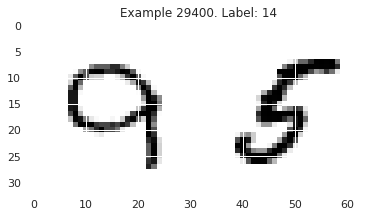

In [14]:
#8
#try display_image2()
display_image2(29400,22329)

<class 'numpy.uint8'>
(32, 32)


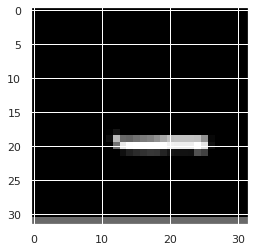

In [16]:
from numpy.core.arrayprint import array2string
def randomMathSign():
  fileName = "/content/drive/My Drive/neuralNetworks/mainData/train/"+str(random.choice(os.listdir("/content/drive/My Drive/neuralNetworks/mainData/train/")))
  fileName2 = fileName + "/"+str(random.choice(os.listdir(fileName))) #change dir name to whatever

  return fileName2;

def randomMathSignTest():
  fileName = "/content/drive/My Drive/neuralNetworks/mainData/test/"+str(random.choice(os.listdir("/content/drive/My Drive/neuralNetworks/mainData/test/")))
  fileName2 = fileName + "/"+str(random.choice(os.listdir(fileName))) #change dir name to whatever

  return fileName2;

def getDataMathImages(fileName):
  image = Image.open(fileName)
  image.show()
  img = image.resize((32,32))

  data = asarray(img)
  return data
def blackToWhite(array):
  i=0
  j=0
  array2 = np.zeros([32, 32], dtype=np.uint8 )
  while(i<32):
    while(j<32):
      #print(str(i)+" "+str(j))
      #print(array[i][j])
      array2[i][j]=abs(255-array[i][j])
      #print(array2[i][j])
      j+=1
    i+=1;
    j=0;
  return array2

fileName = randomMathSign()
fileName = randomMathSignTest()
image=getDataMathImages(fileName)
image = image[:, :, 0]
print(type(image[0][0]))
print(image.shape)
#print(image)
plt.imshow(image, cmap=plt.cm.gray_r)
image2 = blackToWhite(image)
#print(image2)
#plt.title('Example %d. Label: %d' % (position, label))



In [ ]:
#7
#display image which combined 2 image in horizontally and labeled 
def display_image3(position,position2):   ##combined 2 array in numpy and display
    image = train['features'][position].squeeze()
    image2 = train['features'][position2].squeeze()
    fileName = randomMathSign()
    image30 = getDataMathImages(fileName)
    image30 = image30[:, :, 0]
    image3 = blackToWhite(image30);
    image4 = (np.hstack((image, image3)))
    image5 = (np.hstack((image4, image2)))
    print(fileName)
    if(fileName.find("div") != -1):
      label = train['labels'][position]/train['labels'][position2]
    elif(fileName.find("plus") != -1):
      label = train['labels'][position]+train['labels'][position2]
    elif(fileName.find("times") != -1):
      label = train['labels'][position]*train['labels'][position2]
    elif(fileName.find("minus") != -1):
      label = train['labels'][position]-train['labels'][position2]
    else:
      label=0;
    #plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    #print(train['labels'][position]*10+train['labels'][position2])
    plt.title('Example %d. Label: %d' % (position, label))
    plt.imshow(image5, cmap=plt.cm.gray_r)

/content/drive/My Drive/neuralNetworks/mainData/train/minus/481.jpg


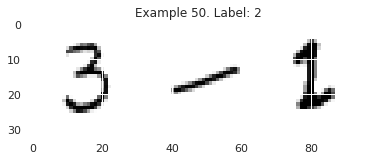

In [ ]:
display_image3(50,70)

In [ ]:
#9
#combination of 2 images and labeled
def combine2Images(firstImagePos,secondImagePos):   ##combined 2 array in numpy and display
    
    image = train['features'][firstImagePos].squeeze()
    image2 = train['features'][secondImagePos].squeeze()
    combinedImage = (np.hstack((image, image2)))
    combinedLabel = train['labels'][firstImagePos]+train['labels'][secondImagePos]
    return combinedImage, combinedLabel

(32, 64)


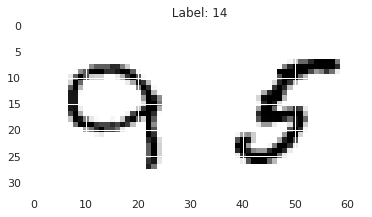

In [ ]:
#10
#try combine2Images()
combinedImageWork, combinedLabelWork = combine2Images(29400,22329)
plt.title(' Label: %d' % ( combinedLabelWork))
plt.imshow(combinedImageWork, cmap=plt.cm.gray_r)
print(combinedImageWork.shape)

In [ ]:
#v1
def combine3Imagesv1(firstImagePos,secondImagePos):   ##combined 2 array in numpy and display
    
    image = train['features'][firstImagePos].squeeze()
    image2 = train['features'][secondImagePos].squeeze()
    fileName = randomMathSign()
    image30 = getDataMathImages(fileName)
    image30 = image30[:, :, 0]
    image3 = blackToWhite(image30);
    image4 = (np.hstack((image, image3)))
    combinedImage = (np.hstack((image4, image2)))
    if(fileName.find("div") != -1):
      if(train['labels'][secondImagePos] != 0):
        combinedLabel = train['labels'][firstImagePos]/train['labels'][secondImagePos]
      else:
        combinedLabel = train['labels'][firstImagePos]/0.01
    elif(fileName.find("plus") != -1):
      combinedLabel = train['labels'][firstImagePos]+train['labels'][secondImagePos]
    elif(fileName.find("times") != -1):
      combinedLabel = train['labels'][firstImagePos]*train['labels'][secondImagePos]
    elif(fileName.find("minus") != -1):
      combinedLabel = train['labels'][firstImagePos]-train['labels'][secondImagePos]
    return combinedImage, combinedLabel

In [ ]:
#v2
import math
combinedImage = np.zeros((3,32,32),dtype=np.uint8)
combinedLabel = np.zeros((3),dtype=np.uint8)
def combine3Images(firstImagePos,secondImagePos):   ##combined 3 array in numpy and display
    
    image = train['features'][firstImagePos].squeeze()
    image2 = train['features'][secondImagePos].squeeze()
    fileName = randomMathSign()
    image30 = getDataMathImages(fileName)
    image30 = image30[:, :, 0]
    image3 = blackToWhite(image30);
    combinedImage[0] = image;
    combinedLabel[0] = train['labels'][firstImagePos];
    combinedLabel[2] = train['labels'][secondImagePos];
    combinedImage[1] = image3;
    combinedImage[2] = image2;
    if(fileName.find("div") != -1):
      combinedLabel[1] = 11
    elif(fileName.find("plus") != -1):
      combinedLabel[1] = 14
    elif(fileName.find("times") != -1):
      combinedLabel[1] = 17
    elif(fileName.find("minus") != -1):
      combinedLabel[1] = 20
    return combinedImage, combinedLabel

(3, 32, 32)
<class 'numpy.uint8'>


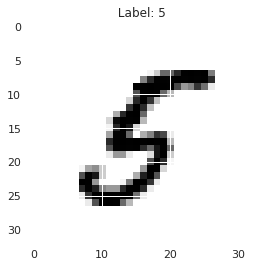

In [ ]:
combinedImageWork = np.zeros((3,32,32),dtype=np.uint8)
combinedLabelWork = np.zeros((3),dtype=np.str_)
combinedImageWork, combinedLabelWork = combine3Images(29400,22329)
plt.title(' Label: %s' % ( combinedLabelWork[2]))
plt.imshow(combinedImageWork[2], cmap=plt.cm.gray_r)
print(combinedImageWork.shape)
print(type(combinedLabelWork[1]))

In [ ]:
#v2 for test data
import math
combinedImage = np.zeros((3,32,32),dtype=np.uint8)
combinedLabel = np.zeros((3),dtype=np.uint8)
def combine3ImagesTest(firstImagePos,secondImagePos):   ##combined 3 array in numpy and display
    
    image = test['features'][firstImagePos].squeeze()
    image2 = test['features'][secondImagePos].squeeze()
    fileName = randomMathSign()
    image30 = getDataMathImages(fileName)
    image30 = image30[:, :, 0]
    image3 = blackToWhite(image30);
    combinedImage[0] = image;
    combinedLabel[0] = test['labels'][firstImagePos];
    combinedLabel[2] = test['labels'][secondImagePos];
    combinedImage[1] = image3;
    combinedImage[2] = image2;
    if(fileName.find("div") != -1):
      combinedLabel[1] = 11
    elif(fileName.find("plus") != -1):
      combinedLabel[1] = 14
    elif(fileName.find("times") != -1):
      combinedLabel[1] = 17
    elif(fileName.find("minus") != -1):
      combinedLabel[1] = 20
    return combinedImage, combinedLabel

(3, 32, 32)
<class 'numpy.uint8'>


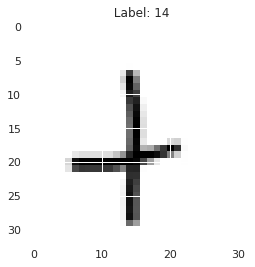

In [ ]:
combinedImageWork = np.zeros((3,32,32),dtype=np.uint8)
combinedLabelWork = np.zeros((3),dtype=np.str_)
combinedImageWork, combinedLabelWork = combine3ImagesTest(5000,2500)
plt.title(' Label: %s' % ( combinedLabelWork[1]))
plt.imshow(combinedImageWork[1], cmap=plt.cm.gray_r)
print(combinedImageWork.shape)
print(type(combinedLabelWork[1]))

>>>ascii charater to string  
asd=42


>>> print(chr(asd))
*
>>>

In [ ]:
#11
#foo and fooLabel is fulled
import random
import numpy as np

i=0   #first digit of data
j=0   #second digit of data
k=0  #for 1000 sample
trainDataImage = np.zeros((300000,32,32),dtype=np.uint8)
trainDataLabel = np.zeros((300000),dtype=np.uint8)
index=0
while(i<10):#first digit of pictures and labels
  #data selection for first digit
  if(i==0):
    dataSource=resultOfZeros
  elif(i==1):
    dataSource=resultOfOnes 
  elif(i==2):
    dataSource=resultOfTwos 
  elif(i==3):
    dataSource=resultOfThrees
  elif(i==4):
    dataSource=resultOfFours 
  elif(i==5):
    dataSource=resultOfFives 
  elif(i==6):
    dataSource=resultOfSixes
  elif(i==7):
    dataSource=resultOfSevens 
  elif(i==8):
    dataSource=resultOfEights
  elif(i==9):
    dataSource=resultOfNines 
  else:
    print("Error occured when data source initialize in i")
 
  while(j<10):#second digit of pictures and labels
    #data selection for second digit
    if(j==0):
      dataSource2=resultOfZeros
    elif(j==1):
      dataSource2=resultOfOnes 
    elif(j==2):
      dataSource2=resultOfTwos 
    elif(j==3):
      dataSource2=resultOfThrees
    elif(j==4):
      dataSource2=resultOfFours 
    elif(j==5):
      dataSource2=resultOfFives 
    elif(j==6):
      dataSource2=resultOfSixes
    elif(j==7):
      dataSource2=resultOfSevens 
    elif(j==8):
      dataSource2=resultOfEights
    elif(j==9):
      dataSource2=resultOfNines 
    else:
      print("Error occured when data source initialize in j")
    while(k<1000): #combined pictures and assign an array
      firstPosition = dataSource[0][random.randint(0, len(dataSource[0])-1)]
      secondPosition = dataSource2[0][random.randint(0, len(dataSource2[0])-1)]
      combinedImage, combinedLabel = combine3Images(firstPosition,secondPosition)
      i2=0
      while(i2<3):
        #print("index of :" + str(index)+" i: "+str(i)+" j: "+str(j)+" k: "+str(k))
        trainDataImage[index] = combinedImage[i2]
        trainDataLabel[index] = combinedLabel[i2]
        index+=1;
        i2+=1
      k=k+1
    k=0
    j=j+1
  j=0
  i=i+1


print(type(trainDataImage[0]))
print(type(trainDataLabel[0]))
print(trainDataImage[0].shape)

<class 'numpy.ndarray'>
<class 'numpy.uint8'>
(32, 32)


In [ ]:
#11
#foo and fooLabel is fulled
#for test
import random
import numpy as np

i=0   #first digit of data
j=0   #second digit of data
k=0  #for 100 sample
testDataImage = np.zeros((30000,32,32),dtype=np.uint8)
testDataLabel = np.zeros((30000),dtype=np.uint8)
index=0
while(i<10):#first digit of pictures and labels
  #data selection for first digit
  if(i==0):
    dataSource=resultOfZerosTest
  elif(i==1):
    dataSource=resultOfOnesTest 
  elif(i==2):
    dataSource=resultOfTwosTest
  elif(i==3):
    dataSource=resultOfThreesTest
  elif(i==4):
    dataSource=resultOfFoursTest 
  elif(i==5):
    dataSource=resultOfFivesTest 
  elif(i==6):
    dataSource=resultOfSixesTest
  elif(i==7):
    dataSource=resultOfSevensTest 
  elif(i==8):
    dataSource=resultOfEightsTest
  elif(i==9):
    dataSource=resultOfNinesTest 
  else:
    print("Error occured when data source initialize in i")
 
  while(j<10):#second digit of pictures and labels
    #data selection for second digit
    if(j==0):
      dataSource2=resultOfZerosTest
    elif(j==1):
      dataSource2=resultOfOnesTest 
    elif(j==2):
      dataSource2=resultOfTwosTest 
    elif(j==3):
      dataSource2=resultOfThreesTest
    elif(j==4):
      dataSource2=resultOfFoursTest 
    elif(j==5):
      dataSource2=resultOfFivesTest 
    elif(j==6):
      dataSource2=resultOfSixesTest
    elif(j==7):
      dataSource2=resultOfSevensTest 
    elif(j==8):
      dataSource2=resultOfEightsTest
    elif(j==9):
      dataSource2=resultOfNinesTest 
    else:
      print("Error occured when data source initialize in j")
    while(k<100): #combined pictures and assign an array
      firstPosition = dataSource[0][random.randint(0, len(dataSource[0])-1)]
      secondPosition = dataSource2[0][random.randint(0, len(dataSource2[0])-1)]
      combinedImage, combinedLabel = combine3ImagesTest(firstPosition,secondPosition)
      i2=0
      while(i2<3):
        print("index of :" + str(index)+" i: "+str(i)+" j: "+str(j)+" k: "+str(k))
        testDataImage[index] = combinedImage[i2]
        testDataLabel[index] = combinedLabel[i2]
        index+=1;
        i2+=1
      k=k+1
    k=0
    j=j+1
  j=0
  i=i+1


print(type(testDataImage[0]))
print(type(testDataLabel[0]))
print(testDataImage[0].shape)

split input photo with using this link

https://kanoki.org/2020/06/11/how-to-split-numpy-arrays/

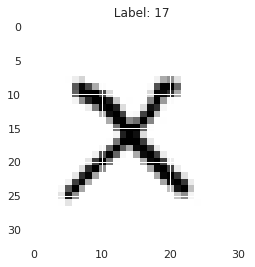

In [ ]:
#display random foo value
i=254683
#plt.title(' Label: %d' % ( fooLabel[i]))
plt.title(" Label: "+ str(trainDataLabel[i]))
plt.imshow(trainDataImage[i], cmap=plt.cm.gray_r)

In [ ]:
#12
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPool2D

In [ ]:
#15
#v2
#from https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.model_selection import KFold
import numpy as np
import gzip
import numpy as np
import pandas as pd
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# change type to uint8 to float32
trainDataImage = trainDataImage.astype('float32')
testDataImage = testDataImage.astype('float32')

#image to gray scale
trainDataImage /= 255
testDataImage /= 255

# Define the model architecture
def modelTrain():
  """model = keras.Sequential()

  model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu',padding="same", input_shape=(32,32,1)))
  model.add(layers.AveragePooling2D())

  model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(layers.AveragePooling2D())

  model.add(layers.Flatten())

  model.add(layers.Dense(units=120, activation='relu'))

  model.add(layers.Dense(units=84, activation='relu'))

  model.add(layers.Dense(units=1, activation = 'linear'))"""
  model = keras.Sequential()

  model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
  model.add(layers.AveragePooling2D())

  model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(layers.AveragePooling2D())

  model.add(layers.Flatten())

  model.add(layers.Dense(units=256, activation='relu'))

  model.add(layers.Dense(units=128, activation='relu'))

  model.add(layers.Dense(units=25, activation = 'softmax'))

  """#https://www.kaggle.com/curiousprogrammer/lenet-5-cnn-with-keras-99-48
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32, 32, 1)))
  model.add(MaxPool2D(strides=2))
  model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
  model.add(MaxPool2D(strides=2))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(84, activation='relu'))
  model.add(Dense(10, activation='softmax'))"""
  return model

In [ ]:
#before the 16
#return model
model = modelTrain()

model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:
#16
#start working on model

#optimizer ada's parameter is set
"""ada = tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, epsilon=1e-08)

#model compile parameters is set
model.compile(optimizer=ada,
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])
              """
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#fitting model with trainData, testData and some parameters
model.fit(trainDataImage, trainDataLabel, 
          epochs=10,
          batch_size=128, 
          validation_data=(testDataImage, testDataLabel))

Epoch 1/10
2344/2344 [==============================] - 94s 40ms/step - loss: 0.1535 - accuracy: 0.9548 - val_loss: 0.0516 - val_accuracy: 0.9838
Epoch 2/10
2344/2344 [==============================] - 92s 39ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0345 - val_accuracy: 0.9907
Epoch 3/10
2344/2344 [==============================] - 92s 39ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0328 - val_accuracy: 0.9916
Epoch 4/10
2344/2344 [==============================] - 94s 40ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0296 - val_accuracy: 0.9919
Epoch 5/10
2344/2344 [==============================] - 96s 41ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0331 - val_accuracy: 0.9918
Epoch 6/10
2344/2344 [==============================] - 97s 41ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0331 - val_accuracy: 0.9919
Epoch 7/10
2344/2344 [==============================] - 98s 42ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0332 -

In [ ]:
model.evaluate(testDataImage, testDataLabel)

938/938 [==============================] - 7s 8ms/step - loss: 0.0368 - accuracy: 0.9929


[0.036832015961408615, 0.992900013923645]

In [ ]:
#v2 for test data
import math
combinedImage = np.zeros((32,96),dtype=np.uint8)
combinedLabel = np.zeros((1),dtype=np.uint8)
def combineTestData(firstImagePosition):   ##combined 3 array in numpy and display
    firstImagePos = firstImagePosition*3
    image = testDataImage[firstImagePos].squeeze()
    mathOperand = testDataImage[firstImagePos+1].squeeze()
    image2 = testDataImage[firstImagePos+2].squeeze()
    image4 = (np.hstack((image, mathOperand)))
    combinedImage = (np.hstack((image4, image2)))
    if(testDataLabel[firstImagePos+1]==11):
      if(testDataLabel[firstImagePos+2]==0):
        combinedLabel=math.inf
      else:
        combinedLabel = int(testDataLabel[firstImagePos])/int(testDataLabel[firstImagePos+2])
    elif(testDataLabel[firstImagePos+1]==14):
      combinedLabel = int(testDataLabel[firstImagePos])+int(testDataLabel[firstImagePos+2])
    elif(testDataLabel[firstImagePos+1]==17):
      combinedLabel = int(testDataLabel[firstImagePos])*int(testDataLabel[firstImagePos+2])
    elif(testDataLabel[firstImagePos+1]==20):
      combinedLabel = int(testDataLabel[firstImagePos])-int(testDataLabel[firstImagePos+2])
    return combinedImage, combinedLabel

In [ ]:
def seperating3Picture(testImageArray):
  testImageArray = np.zeros((3,32,32),dtype=np.uint8)
  testImageArray = np.hsplit(combinedImage,3)
  testImageArray = np.array(testImageArray)
  return testImageArray;

[1.99458262e-11 2.66546507e-11 5.29268906e-10 1.60590324e-04
 3.35601385e-07 2.57507828e-08 8.13816720e-14 1.82050142e-09
 4.05027052e-08 9.99839067e-01 1.68445919e-13 4.82386975e-09
 1.39656963e-13 9.72038273e-14 3.54834955e-15 2.38383087e-15
 9.46838585e-15 1.17784726e-14 7.29825864e-15 1.66353002e-13
 1.61445724e-16 6.57401650e-14 2.49521822e-12 5.99237863e-15
 2.80505023e-14]
9


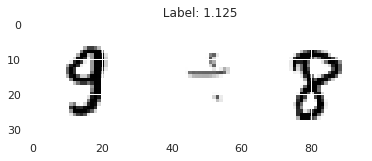

In [ ]:
#display random foo value
combinedImage,combinedLabel = combineTestData(9875)
#plt.title(' Label: %d' % ( fooLabel[i]))
plt.title(" Label: "+ str(combinedLabel))
plt.imshow(combinedImage, cmap=plt.cm.gray_r)

"""testImageArray = np.zeros((3,32,32),dtype=np.uint8)
testImageArray = np.hsplit(combinedImage,3)
testImageArray = np.array(testImageArray)"""
testImageArray = seperating3Picture(combinedImage)
prediction = model.predict(testImageArray)
print(str(prediction[0]))
print(str(np.argmax(prediction[0])))

In [ ]:
  index23=0
  combinedImage,combinedLabel = combineTestData(index23)
  testImageArray = np.zeros((3,32,32),dtype=np.uint8)
  testImageArray = np.hsplit(combinedImage,3)
  testImageArray = np.array(testImageArray)
  prediction = model.predict(testImageArray)

6


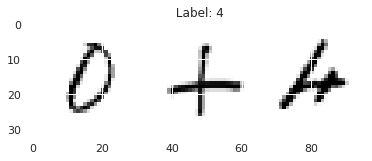

In [ ]:
  index=485
  combinedImage,combinedLabel = combineTestData(index)
  plt.title(" Label: "+ str(combinedLabel))
  plt.imshow(combinedImage, cmap=plt.cm.gray_r)
  testImageArray = seperating3Picture(combinedImage)
  prediction = model.predict(testImageArray)
  divideOperand = abs(float(np.argmax(prediction[1]))-11)
  plusOperand = abs(float(np.argmax(prediction[1]))-14)
  timesOperand = abs(float(np.argmax(prediction[1]))-17)
  minusOperand = abs(float(np.argmax(prediction[1]))-20)
  if(divideOperand<plusOperand and divideOperand<timesOperand and divideOperand<minusOperand): 
    if(round(float(np.argmax(prediction[2]))) != 0):
      predictionResult = round(float(np.argmax(prediction[0])))/round(float(np.argmax(prediction[2])))
    else:
      predictionResult = math.inf
  elif(plusOperand<divideOperand and plusOperand<timesOperand and plusOperand<minusOperand):
    predictionResult = round(float(np.argmax(prediction[0])))+round(float(np.argmax(prediction[2])))
  elif(timesOperand<divideOperand and timesOperand<plusOperand and timesOperand<minusOperand):
    predictionResult = round(float(np.argmax(prediction[0])))*round(float(np.argmax(prediction[2])))
  elif(minusOperand<divideOperand and minusOperand<plusOperand and minusOperand<timesOperand):
    predictionResult = round(float(np.argmax(prediction[0])))-round(float(np.argmax(prediction[2])))
  else:
    predictionResult=100;
  
  print(predictionResult)

In [ ]:
import math
testIndex=0
correctResult=0;
falseResult=0;
unassignedOperand=0;
f = open("/content/drive/MyDrive/neuralNetworks/log.txt", "w")
while(testIndex<10000):
  combinedImage,combinedLabel = combineTestData(testIndex)
  #print(testIndex)
  """testImageArray = np.zeros((3,32,32),dtype=np.uint8)
  testImageArray = np.hsplit(combinedImage,3)
  testImageArray = np.array(testImageArray)"""
  testImageArray = seperating3Picture(combinedImage)
  prediction = model.predict(testImageArray)
  #print(testImageArray[0].shape)
  #print(np.argmax(prediction[1]))
  f.write("Test Index: "+str(testIndex)+"\n")
  f.write("prediction0 : "+str(prediction[0])+" maxIndex0: "+ str(np.argmax(prediction[0]))+"\n")
  f.write("prediction1 : "+str(prediction[1])+" maxIndex1: "+ str(np.argmax(prediction[1]))+"\n")
  f.write("prediction2 : "+str(prediction[2])+" maxIndex2: "+ str(np.argmax(prediction[2]))+"\n")
  divideOperand = abs(float(np.argmax(prediction[1]))-11)
  plusOperand = abs(float(np.argmax(prediction[1]))-14)
  timesOperand = abs(float(np.argmax(prediction[1]))-17)
  minusOperand = abs(float(np.argmax(prediction[1]))-20)
  if(divideOperand<plusOperand and divideOperand<timesOperand and divideOperand<minusOperand): 
    if(round(float(np.argmax(prediction[2]))) != 0):
      predictionResult = round(float(np.argmax(prediction[0])))/round(float(np.argmax(prediction[2])))
    else:
      predictionResult = math.inf
  elif(plusOperand<divideOperand and plusOperand<timesOperand and plusOperand<minusOperand):
    predictionResult = round(float(np.argmax(prediction[0])))+round(float(np.argmax(prediction[2])))
  elif(timesOperand<divideOperand and timesOperand<plusOperand and timesOperand<minusOperand):
    predictionResult = round(float(np.argmax(prediction[0])))*round(float(np.argmax(prediction[2])))
  elif(minusOperand<divideOperand and minusOperand<plusOperand and minusOperand<timesOperand):
    predictionResult = round(float(np.argmax(prediction[0])))-round(float(np.argmax(prediction[2])))
  else:
    predictionResult=100;
    print("There is a problem index: "+ str(testIndex))


  f.write("testIndex: "+str(testIndex)+" predictionResult: " +str(predictionResult)+" ,predicction0: "+str(np.argmax(prediction[0]))+" ,predicction1: "+str(np.argmax(prediction[1]))+" ,predicction2: "+str(np.argmax(prediction[2]))+" ,combinedLabel: "+str(combinedLabel)+" ,testDataLabel0: "+str(testDataLabel[testIndex*3])+" ,testDataLabel1: "+str(testDataLabel[testIndex*3+1])+" ,testDataLabel2: "+str(testDataLabel[testIndex*3+2])+"\n\n")

  if(combinedLabel == predictionResult):
    correctResult+=1;
  elif(predictionResult == 100):
    unassignedOperand+=1
  else:
    falseResult+=1;
    print(testIndex)
  
  testIndex +=1
f.write("\n"+"Correction : " + str(correctResult))
f.close()
print("Correction : " + str(correctResult))
print("unassignedOperand : " + str(unassignedOperand))

39
485
522
557
639
660
1133
1143
1226
1289
1299
1439
1460
1473
1479
1487
1490
1599
1626
1673
1678
1684
1706
1742
1776
1799
1812
1819
1833
1857
1870
1979
2017
2105
2134
2159
2345
2409
2509
2526
2613
2693
2734
2753
2763
2834
2873
2923
2927
2943
3128
3418
3481
3511
3527
3563
3585
3639
3649
3841
3886
3901
3904
3971
4041
4103
4110
4145
4167
4209
4210
4223
4278
4290
4353
4434
4449
4463
4513
4639
4652
4657
4663
4688
4694
4702
4714
4797
4804
4821
4855
4862
4875
4881
4903
5059
5106
5199
5271
5436
5465
5473
5483
5696
5711
5723
5778
5836
5857
5897
5918
5960
5971
5976
5996
6010
6139
6148
6152
6250
6251
6449
6470
6475
6488
6497
6500
6513
6571
6620
6652
6725
6797
6838
6842
6848
6902
6911
6945
7144
7145
7149
7186
7214
7238
7291
7354
7368
7481
7492
7650
7657
7752
7780
7815
7829
7857
7875
7877
8147
8163
8389
8436
8437
8457
8464
8515
8570
8599
8622
8666
8676
8725
8778
8789
8863
8930
9073
9171
9190
9242
9286
9314
9333
9368
9403
9408
9418
9439
9441
9443
9447
9465
9469
9480
9494
9548
9570
9571
9604
9866
99

<class 'numpy.ndarray'>
(30000, 28, 28)
[-1.1279818]


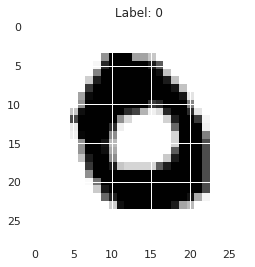

In [ ]:
#17
#predictions checking
print(type(testDataImage))
print(testDataImage.shape)
prediction = model.predict(testDataImage)
print(prediction[756])
plt.title('Label: %d' %  testDataLabel[756])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[756].squeeze(),cmap=plt.cm.binary)
plt.show()

[45.47782]


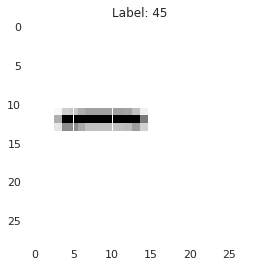

In [ ]:
print(prediction[757])
plt.title('Label: %d' %  testDataLabel[757])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[757].squeeze(),cmap=plt.cm.binary)
plt.show()

[4.574255]


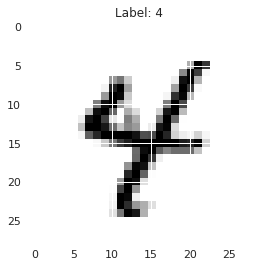

In [ ]:
print(prediction[758])
plt.title('Label: %d' %  testDataLabel[758])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[758].squeeze(),cmap=plt.cm.binary)
plt.show()

In [ ]:
#18 
# get the accuracy of the model
from math import floor,ceil
i=0
floorCeilNum=0
roundNum=0
while(i<10000):
  if(floor(predictions[i]) == testDataLabel[i] or ceil(predictions[i]) == testDataLabel[i]):
    floorCeilNum+=1
  if(round(float(predictions[i])) == testDataLabel[i]):
    roundNum+=1
  i+=1
print("Floored or ceiled prediction is correct = " +str(floorCeilNum)+" accuracy in 10000 samples is %" +str(floorCeilNum/100))
print("Rounded prediction is correct = " +str(roundNum)+" accuracy in 10000 samples is %" +str(roundNum/100))

Floored or ceiled prediction is correct = 0 accuracy in 10000 samples is %0.0
Rounded prediction is correct = 0 accuracy in 10000 samples is %0.0


In [ ]:
#alternative version v1
#source : https://www.kaggle.com/curiousprogrammer/lenet-5-cnn-with-keras-99-48

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# change type to uint8 to float32
trainDataImage = trainDataImage.astype('float32')
testDataImage = testDataImage.astype('float32')

#image to gray scale
trainDataImage /= 255
testDataImage /= 255

def modelTrain():
  # Define the K-fold Cross Validator
  #10-fold Cross Calidator
  kfold = KFold(n_splits=10, shuffle=True)

  # K-fold Cross Validation model evaluation
  for train, test in kfold.split(trainDataImage, trainDataLabel):
    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 56, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(units = 1))
  return model


In [ ]:
#source is : https://www.programcreek.com/python/example/89669/keras.layers.MaxPooling2D 

#alternative Version

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# change type to uint8 to float32
trainDataImage = trainDataImage.astype('float32')
testDataImage = testDataImage.astype('float32')

#image to gray scale
trainDataImage /= 255
testDataImage /= 255

def modelTrain():
  # Define the K-fold Cross Validator
  #10-fold Cross Calidator
  kfold = KFold(n_splits=10, shuffle=True)

  # K-fold Cross Validation model evaluation
  for train, test in kfold.split(trainDataImage, trainDataLabel):
    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(28, 56, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(1))
  return model


10000
[97.70737]


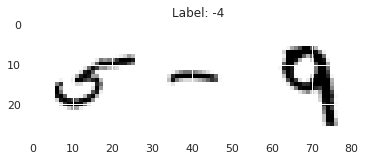

In [ ]:
#17 
#predictions checking
print(len(predictions))
print(predictions[5689])
plt.title('Label: %d' %  testDataLabel[5689])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[5689].squeeze(),cmap=plt.cm.binary)
plt.show()

[97.70737]


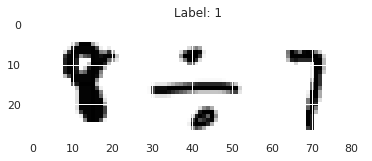

In [ ]:
print(predictions[8500])
plt.title('Label: %d' %  testDataLabel[8500])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[8500].squeeze(),cmap=plt.cm.binary)
plt.show()

[97.70738]


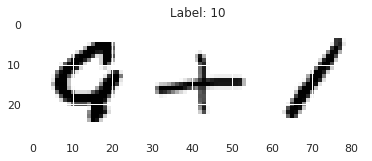

In [ ]:
print(predictions[9758])
plt.title('Label: %d' %  testDataLabel[9758])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[9758].squeeze(),cmap=plt.cm.binary)
plt.show()

[97.70737]


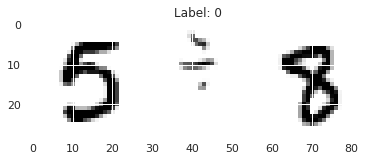

In [ ]:
print(predictions[4444])
plt.title('Label: %d' %  testDataLabel[4444])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[4444].squeeze(),cmap=plt.cm.binary)
plt.show()

[97.70737]


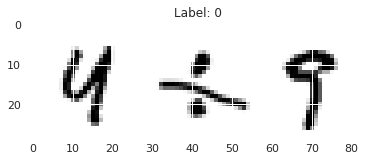

In [ ]:
print(predictions[3333])
plt.title('Label: %d' %  testDataLabel[3333])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[3333].squeeze(),cmap=plt.cm.binary)
plt.show()

[97.70737]


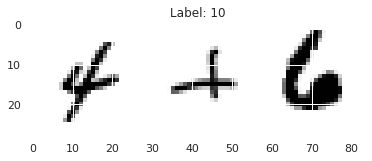

In [ ]:
print(predictions[2222])
plt.title('Label: %d' %  testDataLabel[2222])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[2222].squeeze(),cmap=plt.cm.binary)
plt.show()

[16.016108]


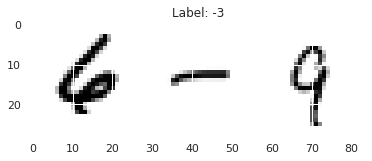

In [ ]:
print(predictions[6666])
plt.title('Label: %d' %  testDataLabel[6666])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[6666].squeeze(),cmap=plt.cm.binary)
plt.show()

[27.500978]


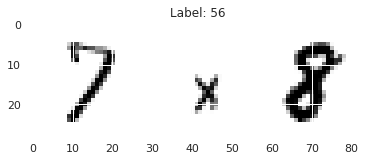

In [ ]:
print(predictions[7777])
plt.title('Label: %d' %  testDataLabel[7777])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[7777].squeeze(),cmap=plt.cm.binary)
plt.show()

[29.880648]


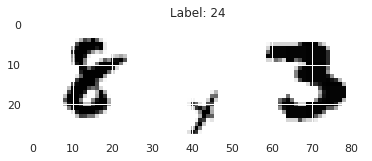

In [ ]:
print(predictions[8888])
plt.title('Label: %d' %  testDataLabel[8888])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[8888].squeeze(),cmap=plt.cm.binary)
plt.show()

[3.8095565]


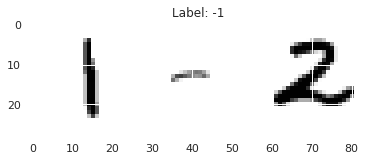

In [ ]:
print(predictions[488])
plt.title('Label: %d' %  testDataLabel[488])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[488].squeeze(),cmap=plt.cm.binary)
plt.show()

[15.009599]


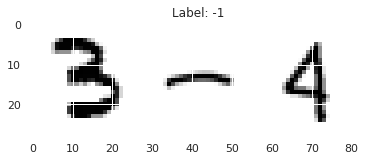

In [ ]:
print(predictions[1245])
plt.title('Label: %d' %  testDataLabel[1245])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[1245].squeeze(),cmap=plt.cm.binary)
plt.show()

[22.089693]


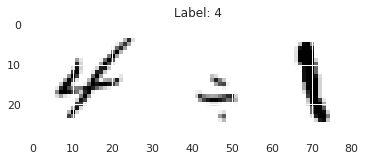

In [ ]:
print(predictions[4212])
plt.title('Label: %d' %  testDataLabel[4212])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[4212].squeeze(),cmap=plt.cm.binary)
plt.show()

[9.537987]


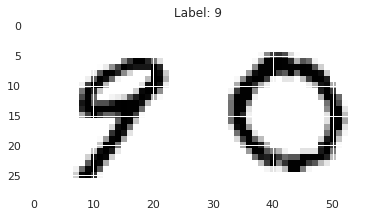

In [ ]:
print(predictions[7648])
plt.title('Label: %d' %  testDataLabel[7648])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[7648].squeeze(),cmap=plt.cm.binary)
plt.show()

[14.675799]


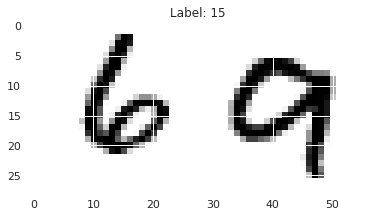

In [ ]:
print(predictions[5421])
plt.title('Label: %d' %  testDataLabel[5421])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[5421].squeeze(),cmap=plt.cm.binary)
plt.show()

[14.241512]


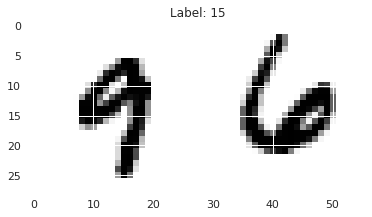

In [ ]:
print(predictions[9845])
plt.title('Label: %d' %  testDataLabel[9845])
#plt.imshow(foo[56664].squeeze(), cmap=plt.cm.gray_r)
plt.imshow(testDataImage[9845].squeeze(),cmap=plt.cm.binary)
plt.show()